<a href="https://colab.research.google.com/github/nferrucho/NPL/blob/main/curso1/ciclo27Copia_de_Copia_de_taller2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://drive.google.com/uc?export=view&id=1AQr9H9bXDeNPchTRufU78g8z0yxHvrmC" width="100%">

# **Taller 2**
---

En este taller se evaluarán las habilidades adquiridas en expresiones regulares, manejo de la librería `spacy` y preprocesamiento a partir del conjunto de datos [Spanish News Classification](https://www.kaggle.com/datasets/kevinmorgado/spanish-news-classification) de Kaggle.

En este caso, usted deberá realizar algunas operaciones de búsqueda de textos con expresiones regulares y normalización de textos. Comenzamos importando las librerías necesarias:

In [11]:
#TEST_CELL
!pip install unidecode

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 2.1 MB/s eta 0:00:00


In [12]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from unidecode import unidecode
from IPython.display import display
plt.style.use("ggplot")

Cargamos el conjunto de datos:

In [13]:
#TEST_CELL
df = pd.read_parquet("https://raw.githubusercontent.com/mindlab-unal/mlds4-datasets/main/u3/spanish_news.parquet")
display(df.head())

,url,news,Type
0,https://www.larepublica.co/redirect/post/3201905,Durante el foro La banca articulador empresari...,Otra
1,https://www.larepublica.co/redirect/post/3210288,El regulador de valores de China dijo el domin...,Regulaciones
2,https://www.larepublica.co/redirect/post/3240676,En una industria históricamente masculina como...,Alianzas
3,https://www.larepublica.co/redirect/post/3342889,Con el dato de marzo el IPC interanual encaden...,Macroeconomia
4,https://www.larepublica.co/redirect/post/3427208,Ayer en Cartagena se dio inicio a la versión n...,Otra


Este conjunto de datos contiene tres columnas:

- `url`: dirección de donde se extrajeron los datos.
- `news`: contenido textual de una noticia.
- `Type`: tipo de noticia.

Este corpus está conformado por `1217` documentos.

In [14]:
#TEST_CELL
display(df.shape)

(1217, 3)

De la misma forma, el conjunto de datos contiene noticias de 7 categorías distintas:

In [ ]:
#TEST_CELL
display(df.Type.value_counts())

,count
Type,
Macroeconomia,340
Alianzas,247
Innovacion,195
Regulaciones,142
Sostenibilidad,137
Otra,130
Reputacion,26


## **1. Reconocimiento de URLs**
---

En este punto deberá extraer el protocolo, dominio, y ruta de la cualquiera de las URLs que se encuentran dentro de la columna `url` del conjunto de datos.

Por ejemplo, la siguiente URL:

`https://www.larepublica.co/redirect/post/3201905`

Tiene los siguientes elementos:

- **Protocolo**: `https`
- **Dominio**: `www.larepublica.co`
- **Ruta**: `redirect/post/320195`

Para esto, debe implementar la función `url_elements` la cual deberá retornar una expresión regular que contenga tres grupos nombrados de la siguiente forma: `protocol`, `domain` y `route`.

**Parámetros**

Esta función no tiene parámetros.

**Retorna**

- `pat`: expresión regular compilada con los tres elementos de una URL.

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Pistas</b></font>
</summary>

- Recuerde que los grupos nombrados dentro de expresiones regulares en _Python_ se definen siguiendo la notación `(?P<tag>regex)` donde `tag` es el nombre del grupo y `regex` es la expresión regular que describe el grupo.
- Se recomienda usar cuantificadores como `+` para detectar secuencias de longitud mayor a 1 en los identificadores de cada grupo.
- Se recomienda revisar el identificador `\w`, ya que las URL normalmente usan caracteres alfanuméricos para representar algunas partes.
</details>

In [ ]:
# FUNCIÓN CALIFICADA url_elements:

def url_elements():
    ### ESCRIBA SU CÓDIGO AQUÍ ###
    #regex = r'^(?P<protocol>https?)://(?P<domain>[^/]+)(?P<route>/.*)?$'
    regex = r'^(?P<protocol>https?)://(?P<domain>[^/]+)(?:/(?P<route>.*))?$'
    pat = re.compile(regex)
    return pat
    ### FIN DEL CÓDIGO ###

In [ ]:
#TEST_CELL
pat = url_elements()
match = re.search(pat, df.url.iloc[0])
res = (match.group("protocol"), match.group("domain"), match.group("route"))
display(res)

('https', 'www.larepublica.co', 'redirect/post/3201905')

**Salida esperada**:

En este primer ejemplo se obtienen los elementos de la primera URL en el conjunto de datos:

```python
❱ display(res)
('https', 'www.larepublica.co', 'redirect/post/3201905')
```

In [ ]:
#TEST_CELL
pat = url_elements()
match = re.search(pat, df.url.iloc[100])
res = (match.group("protocol"), match.group("domain"), match.group("route"))
display(res)

('https',
 'www.bbva.com',
 'es/mx/sostenibilidad/irrupcion-de-lo-femenino-en-el-cine-documental/')

**Salida esperada**:

En este segundo ejemplo se obtienen los elementos de la URL número 100 en el conjunto de datos:

```python
❱ display(res)
('https',
'www.bbva.com',
'es/mx/sostenibilidad/irrupcion-de-lo-femenino-en-el-cine-documental/')
```

## **2. Selección de Categorías con Patrón**
---

En este punto deberá seleccionar todos los registros del _DataFrame_ donde la columna `Type` corresponda con determinado patrón de entrada.

Para esto debe implementar la función `filter_type`, la cual recibirá el conjunto de datos y una expresión regular sobre la que debe filtrar.

**Parámetros**

- `df`: conjunto de datos en formato `pd.DataFrame`.
- `pat`: expresión regular sobre la que se debe filtrar.

**Retorna**

- `filtered_df`: `DataFrame` resultante del filtro por patrón de búsqueda.

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Pistas</b></font>
</summary>

- Recuerde que las `Series` de `pandas` contienen el método `str.contains`, este método le permitirá aplicar una expresión regular directamente.
- Puede usar el método `apply` de `pandas` para validar elemento a elemento si hay un match de la expresión regular.
</details>

In [15]:
# FUNCIÓN CALIFICADA filter_type:

def filter_type(df, pat):
    ### ESCRIBA SU CÓDIGO AQUÍ ###
    #filtered_df = pd.DataFrame({})
    filtered_df = df[df['Type'].str.contains(pat)]
    return filtered_df
    ### FIN DEL CÓDIGO ###

In [16]:
#TEST_CELL
pat = re.compile(r"^[A].*$")
filtered_df = filter_type(df, pat)
display(filtered_df.Type.value_counts())

,count
Type,
Alianzas,247


**Salida esperada**

Este caso de prueba debería extraer todos los casos donde `Type` comienza por una `"A"` mayúscula y luego tiene cualquier secuencia de letras.

```python
❱ display(filtered_df.Type.value_counts())
Alianzas    247
Name: Type, dtype: int64
```

In [17]:
#TEST_CELL
pat = re.compile(r"^.*on$")
filtered_df = filter_type(df, pat)
display(filtered_df.Type.value_counts())

,count
Type,
Innovacion,195
Reputacion,26


**Salida esperada**

Este caso de prueba debería extraer todos los casos donde `Type` termine por la secuencia `"on"`.

```python
❱ display(filtered_df.Type.value_counts())
Innovacion    195
Reputacion     26
Name: Type, dtype: int64
```

## **3. Documentos de Spacy**
---

En este punto deberá convertir todo el corpus en una lista de documentos de `spacy`. Para ello, debe implementar la función `to_spacy` para extraer el texto de la columna `news` del `DataFrame` dado y convertirlo a objetos tipo `Doc` usando un _pipeline_ dado.

**Parámetros**

- `df`: conjunto de datos.
- `nlp`: _pipeline_ de `spacy`.

**Retorna**

- `corpus`: lista de documentos de `spacy`

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Pistas</b></font>
</summary>

- Puede usar el método `pipe` para pasar una lista de textos a un _pipeline_ y convertir masivamente varios resultados a `Doc` de `spacy`. Tenga en cuenta que debe convertir el resultado a una lista de _Python_.
- Puede usar el objeto `nlp` como una función para convertir un texto individual a un `Doc`, de esta forma, debe iterar sobre todo el corpus.
</details>

In [18]:
# FUNCIÓN CALIFICADA to_spacy:

def to_spacy(df, nlp):
    ### ESCRIBA SU CÓDIGO AQUÍ ###
    corpus = []
    if 'news' not in df.columns:
        raise ValueError("El dataframe debe contener una columna llamada 'news'.")

    # El dataframe no tenga valores nulos en la columna 'news'
    df = df.dropna(subset=['news'])

    # Usa el método pipe para procesar los textos en masa
    texts = df['news'].tolist()  # Convierte la columna a una lista de textos
    corpus = list(nlp.pipe(texts))  # Usa pipe para procesar los textos en paralelo y convierte el resultado a una lista

    return corpus
    ### FIN DEL CÓDIGO ###

In [19]:
#TEST_CELL
import spacy
spacy.cli.download("es_core_news_sm")
nlp = spacy.load("es_core_news_sm")

✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [20]:
#TEST_CELL
corpus = to_spacy(df.head(20), nlp)
display(type(corpus))
display(type(corpus[0]))

list

spacy.tokens.doc.Doc

**Salida esperada**

Este caso de prueba debe convertir los primeros 20 documentos del corpus a objetos de `spacy`.

```python
❱ display(type(corpus))
list

❱ display(type(corpus[0]))
spacy.tokens.doc.Doc
```

## **4. Recuento de Stop Words**
---

En este punto, deberá implementar una función que permita contar el número de _stopwords_ por cada documento (de `spacy`). Para ello, debe implementar la función `stopword_count` para obtener los conteos de _stopwords_ a partir de una lista de documentos de `spacy`.

**Parámetros**
---

- `corpus`: lista de documentos de `spacy`.

**Retorna**

- `counts`: lista de conteos de _stopwords_ por documento.

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Pistas</b></font>
</summary>

- Recuerde que cada `Token` en `spacy` contiene el atributo `is_stop` que determina si el elemento es una _stopword_.
- Puede recorrer todos los tokens de un documento de `spacy` al iterar sobre el mismo, y sumar los valores de `token.is_stop`.
</details>

In [21]:
# FUNCIÓN CALIFICADA stopword_count:

def stopword_count(corpus):
    ### ESCRIBA SU CÓDIGO AQUÍ ###
    counts = []
    for doc in corpus:
        # Contar las stopwords en el documento
        count = sum(token.is_stop for token in doc)
        counts.append(count)
    return counts
    ### FIN DEL CÓDIGO ###

In [22]:
#TEST_CELL
nlp = spacy.load(
        "es_core_news_sm",
        exclude=[
            "ner", "tok2vec", "senter", "morphologizer",
            "parser", "attribute_ruler", "lemmatizer"]
        )
corpus = to_spacy(df, nlp)
counts = stopword_count(corpus)
display(counts[:10])

[135, 190, 210, 248, 438, 88, 362, 58, 288, 100]

**Salida esperada**

Este caso de prueba debe obtener los conteos de _stopwords_ para los primeros 10 documentos del corpus.

```python
❱ display(counts[:10])
[135, 190, 210, 248, 438, 88, 362, 58, 288, 100]
```

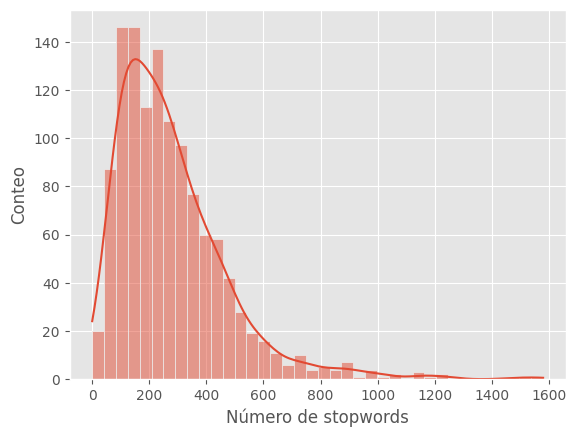

In [23]:
#TEST_CELL
fig, ax = plt.subplots()
sns.histplot(counts, kde=True, ax=ax)
ax.set_xlabel("Número de stopwords")
ax.set_ylabel("Conteo")
fig.show()

**Salida esperada**

Este caso de prueba debe generar un histograma de la distribución de stopwords en todos los documentos.

<img src="https://drive.google.com/uc?export=view&id=1FYuE4Yywuu65KOJ5z_Oz8WPphdnx1toT" width="50%">

## **5. Extracción de Palabras por etiquetas POS**
---

En este punto, deberá implementar una función que permita extraer las palabras de un texto que tengan etiquetas de tipo POS de grano grueso dentro de una lista de posibles valores.

Para ello deberá implementar la función `get_pos_words` la cual recibe una lista de documentos de `spacy` y debe retornar una lista de strings con las palabras filtradas y concatenadas por cada documento.

**Parámetros**
---

- `corpus`: lista de documentos de `spacy`.
- `pos_list`: lista de etiquetas POS a filtrar.

**Retorna**

- `filtered_pos`: lista strings con el filtro por etiquetas POS.

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Pistas</b></font>
</summary>

- Recuerde que puede acceder a una etiqueta de tipo _POS_ con el atributo `pos_` de un `Token` de `spacy`.
- Es importante que el resultado por cada documento sea un string y no una lista de tokens de `spacy`, puede usar el método `join` de los strings en _Python_ y el atributo `text` de los tokens de `spacy`.
</details>

In [24]:
# FUNCIÓN CALIFICADA get_pos_words:
def get_pos_words(corpus, pos_list):
    ### ESCRIBA SU CÓDIGO AQUÍ ###
    filtered_pos = []
    for doc in corpus:
        # Filtrar palabras con las etiquetas POS especificadas
        pos_words = [token.text for token in doc if token.pos_ in pos_list]

        # Concatenar las palabras en un solo string
        pos_words_text = ' '.join(pos_words)

        # Añadir el resultado a la lista
        filtered_pos.append(pos_words_text)
    return filtered_pos
    ### FIN DEL CÓDIGO ###

In [25]:
#TEST_CELL
nlp = spacy.load("es_core_news_sm")
corpus = to_spacy(df.head(2), nlp)
filtered_pos = get_pos_words(corpus, ["VERB"])
display(filtered_pos[1])

'dijo buscará apoyará endurecieron expresaron dijo tomó mantener reforzar elijan salir avanzar continuará dijo dicho exigirá revelen afectar permitirles captar revelar denegó cotizar denegada añadió reforzado lanzó dijo reforzaría cotizan dijo someterse cotizar dicho informar cotizar'

**Salida esperada**

Este caso de prueba debe extraer todos los verbos del segundo texto

```python
❱ display(filtered_pos[1])
'dijo buscará apoyará endurecieron expresaron dijo tomó mantener reforzar elijan salir avanzar continuará dijo dicho exigirá revelen afectar permitirles captar revelar denegó cotizar denegada añadió reforzado lanzó dijo reforzaría cotizan dijo someterse cotizar dicho informar cotizar'
```

In [26]:
#TEST_CELL
filtered_pos = get_pos_words(corpus, ["VERB", "NOUN"])
display(filtered_pos[0])

'foro banca desarrollo director sostenibilidad clientes aseguró entender sostenibilidad asociar costos creo tener concepto negocio tener impacto imaginamos reto cambiar prioridades compitan casos tratar mantener prioridad cuanto ambición negocios reto coyuntura sostenibilidad abre oportunidades fuentes financiamiento agregó directivo argumentó encuentra juego tema rentabilidad negocios particular tema viabilidad mundo negocios mundo general conocemos riesgos transición cambio inclusión desarrollo están dejó aspecto paralelo responsabilidad tiene estar estrategias negocio manera logran impulsar proyectos incluidos aspiraciones concluyó'

**Salida esperada**

Este caso de prueba debe extraer todos los verbos y sustantivos del primer documento

```python
❱ display(filtered_pos[0])
'foro banca desarrollo director sostenibilidad clientes aseguró entender sostenibilidad asociar costos creo tener concepto negocio tener impacto imaginamos reto cambiar prioridades compitan casos tratar mantener prioridad cuanto ambición negocios reto coyuntura sostenibilidad abre oportunidades fuentes financiamiento agregó directivo argumentó encuentra juego tema rentabilidad negocios particular tema viabilidad mundo negocios mundo general conocemos riesgos transición cambio inclusión desarrollo están dejó aspecto paralelo responsabilidad tiene estar estrategias negocio manera logran impulsar proyectos incluidos aspiraciones concluyó'
```

## **6. Preprocesamiento**
---

En este punto usted deberá implementar un flujo de preprocesamiento para textos. Las tareas que debe realizar son las siguientes:

1. Filtrar stopwords.
2. Seleccionar únicamente palabras en algunas categorías de tipo _POS_
3. Normalizar el texto con `unidecode`.
4. Convertir a minúsculas.

Para ello debe implementar la función `preprocess` la cual recibirá un documento de `spacy` y la lista de etiquetas _POS_ para filtrar, con esto deberá retornar un string con el resultado del preprocesamiento.

**Parámetros**
---

- `doc`: documento de `spacy`.
- `pos_list`: lista de etiquetas POS a filtrar.

**Retorna**

- `preprocess_text`: texto preprocesado.

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Pistas</b></font>
</summary>

- Recuerde filtrar stopwords con el atributo `is_stop` y filtrar etiquetas _POS_ con el atributo `pos_` de los tokens de `spacy`.
- Con la librería `unidecode` puede normalizar el texto.
- Puede convertir los textos en minúsculas con el atributo `lower` de un string.
</details>

In [32]:
# FUNCIÓN CALIFICADA preprocess:

def preprocess(doc, pos_list):
    ### ESCRIBA SU CÓDIGO AQUÍ ###
    preprocess_text = ""

    # Filtrar palabras por etiquetas POS especificadas
    #pos_words = get_pos_words([doc], pos_list)[0]

    # Filtrar stopwords de las palabras filtradas
    #filtered_words = [word for word in pos_words.split() ]

    # Unificar en un solo string
    #preprocess_text = ' '.join(filtered_words)

    # Filtrar tokens que no sean stopwords y que estén en la lista de etiquetas POS proporcionada
    filtered_tokens = [token for token in doc if not token.is_stop and token.pos_ in pos_list]

    # Normalizar y convertir a minúsculas
    preprocess_text = ' '.join([unidecode(token.text.lower()) for token in filtered_tokens])


    # Normalizar el texto con unidecode y convertir a minúsculas
    #preprocess_text = unidecode(preprocess_text).lower()

    return preprocess_text
    ### FIN DEL CÓDIGO ###

In [33]:
#TEST_CELL
nlp = spacy.load("es_core_news_sm")
corpus = to_spacy(df.head(10), nlp)
preprocess_text = preprocess(corpus[0], ["VERB", "NOUN"])
display(preprocess_text)

'foro banca desarrollo director sostenibilidad clientes entender sostenibilidad asociar costos concepto negocio impacto imaginamos reto cambiar prioridades compitan casos tratar mantener prioridad ambicion negocios reto coyuntura sostenibilidad abre oportunidades fuentes financiamiento directivo argumento juego tema rentabilidad negocios particular tema viabilidad mundo negocios mundo general conocemos riesgos transicion cambio inclusion desarrollo aspecto paralelo responsabilidad estrategias negocio logran impulsar proyectos incluidos aspiraciones concluyo'

**Salida esperada**

Este caso de prueba muestra el primer documento preprocesado.

```python
❱ display(preprocess_text)
'foro banca desarrollo director sostenibilidad clientes aseguro entender sostenibilidad asociar costos creo tener concepto negocio tener impacto imaginamos reto cambiar prioridades compitan casos tratar mantener prioridad cuanto ambicion negocios reto coyuntura sostenibilidad abre oportunidades fuentes financiamiento agrego directivo argumento encuentra juego tema rentabilidad negocios particular tema viabilidad mundo negocios mundo general conocemos riesgos transicion cambio inclusion desarrollo estan dejo aspecto paralelo responsabilidad tiene estar estrategias negocio manera logran impulsar proyectos incluidos aspiraciones concluyo'
```

In [34]:
#TEST_CELL
nlp = spacy.load("es_core_news_sm")
corpus = to_spacy(df.head(10), nlp)
preprocess_text = preprocess(corpus[1], ["NOUN", "PROPN"])
display(preprocess_text)

'regulador valores china domingo cooperacion par salidas bolsa extranjero supervisores exigencias divulgacion informacion empresas preocupacion medidas pekin comision reguladora valores china csrc comunicado nota requisitos comision valores unidos sec empresas partes espiritu respeto comunicaciones regulacion csrc empresas bolsa politica china reforma apertura apertura mundo sitio sec viernes companias incertidumbre acciones gobierno china resultados empresa capital mercados valores emisores permiso autoridades bolsas riesgos aprobacion sec.china control emision acciones extranjero investigacion ciberseguridad gigante transporte didi global inc mes cotizacion york gabinete julio supervision empresas extranjero regulador ciberespacio empresa datos millon usuarios revision ciberseguridad extranjero banco china empresas pago planes extranjero'

**Salida esperada**

Este caso de prueba muestra el segundo documento preprocesado.

```python
❱ display(preprocess_text)
'regulador valores china domingo cooperacion par salidas bolsa extranjero supervisores exigencias divulgacion informacion empresas preocupacion medidas pekin comision reguladora valores china csrc comunicado nota requisitos comision valores estados unidos sec empresas partes espiritu respeto comunicaciones regulacion csrc empresas bolsa politica china reforma apertura apertura mundo sitio sec viernes companias incertidumbre acciones gobierno china resultados empresa capital mercados valores emisores permiso autoridades bolsas riesgos aprobacion sec.china control emision acciones extranjero investigacion ciberseguridad gigante transporte didi global inc mes dias cotizacion nueva york gabinete julio supervision empresas extranjero regulador ciberespacio empresa datos millon usuarios revision ciberseguridad extranjero banco china empresas pago planes extranjero'
```

## Créditos
---

* **Profesor:** [Felipe Restrepo Calle](https://dis.unal.edu.co/~ferestrepoca/)
* **Asistentes docentes:**
    - [Juan Sebastián Lara Ramírez](https://www.linkedin.com/in/juan-sebastian-lara-ramirez-43570a214/).
* **Coordinador de virtualización:**
    - [Edder Hernández Forero](https://www.linkedin.com/in/edder-hernandez-forero-28aa8b207/).

**Universidad Nacional de Colombia** - *Facultad de Ingeniería*